In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/SampleSuperstore.csv.zip')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
# shape of the dataset
df.shape

(9993, 13)

In [4]:
# Checking Data type of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9993 non-null   object 
 1   Segment       9993 non-null   object 
 2   Country       9993 non-null   object 
 3   City          9993 non-null   object 
 4   State         9993 non-null   object 
 5   Postal Code   9993 non-null   int64  
 6   Region        9993 non-null   object 
 7   Category      9993 non-null   object 
 8   Sub-Category  9993 non-null   object 
 9   Sales         9993 non-null   float64
 10  Quantity      9993 non-null   int64  
 11  Discount      9993 non-null   float64
 12  Profit        9993 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.0+ KB


All the columns are in there appropriate data type so no need to change the data type of any column.

In [5]:
# checking for Null values
df.isnull().sum()

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


There are No null values in any column of the Dataset

In [27]:
# checking Descriptive statistics for Numerical columns
df.iloc[:,8:].describe()

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.856670,3.789753,0.156218,28.652464
std,623.276273,2.225149,0.206456,234.271411
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728000
50%,54.480000,3.000000,0.200000,8.662000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


The Describe function shows the Descriptive summary of the Numerical Variables

> The Mean sales is 229.86$  with a average Profit of 28.7

> The maximum profit was 22638.5$  with 8399 profit

> The maximum loss we get is 6599$

> On an Average there are 3.78 Quantities of orders

> There shows a high Standard deviation which suggest there are fluctutions in sales in different regions.

## Visualization by Charts

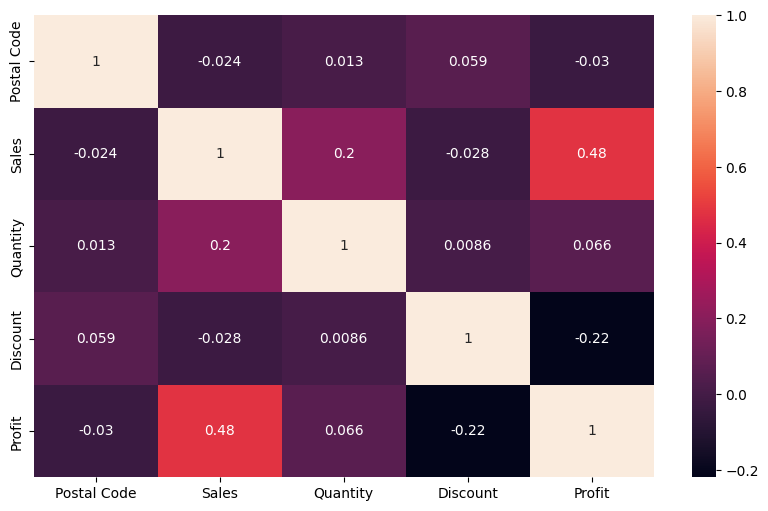

In [31]:
# Heatmap of Numerical features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

The HeatMap shows the correlation of Numerical varibales with other Numerical Variables (A correlation of 1 means perfect positive correlation and -1 means perfect negative correlation)

> In our Heatmap there is 0.48 correlation of Sales with Profit Means with increasing sales the profit tends to Increase

> All other variables so little to No correlation.

> only Discount shows Negative correlation with Profit and sales (i.e -0.22 and 0.028 Respectivels) although not much but profit and Sales tends to descrease with Discount.

<Figure size 1000x600 with 0 Axes>

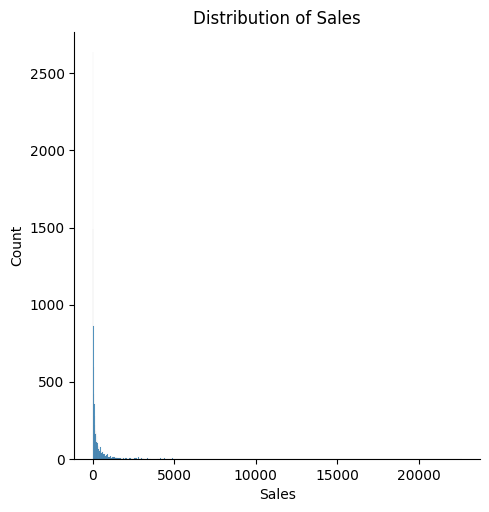

In [41]:
# Distribution of sales
plt.figure(figsize=(10,6))
sns.displot(df['Sales'])
plt.title("Distribution of Sales")
plt.show()


As there are outliers in Sales the distribution of the Sales are highly Right Skewed. we are not able to extract usefull information from it next we will try to Zoom it out for the region where majority of the points are situated. to get the better idea of the Distribution of Sales

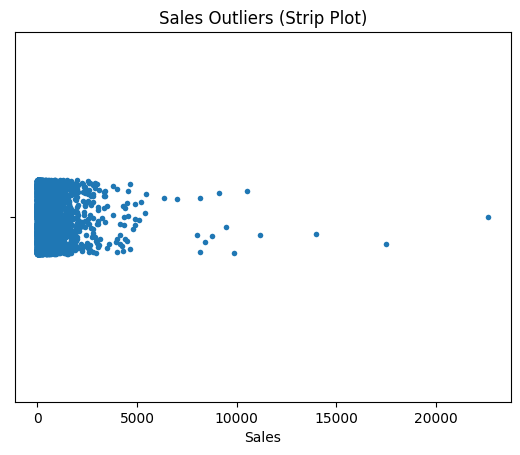

In [42]:
# Strip plot
sns.stripplot(x=df['Sales'], size=4, jitter=True)
plt.title("Sales Outliers (Strip Plot)")
plt.show()


The strip plot shows that majority of the sales are in between 0-5000$ with few outliears extended to the range of 22000. The maximum sale was 22638 seen by descriptive summary and verified by strip plot

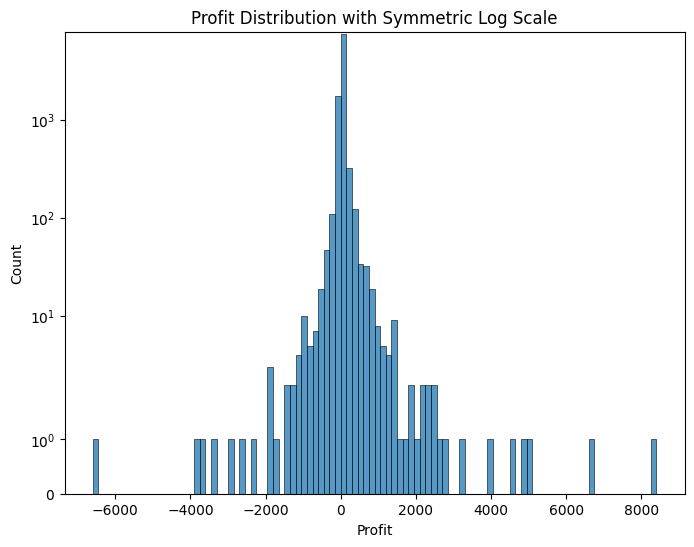

In [54]:
# Distribution of Profit with Symmetric Log Scale
plt.figure(figsize=(8,6))
sns.histplot(df['Profit'], bins=100)
plt.yscale('symlog')  # Logarithmic scale that handles zero and negative
plt.title('Profit Distribution with Symmetric Log Scale')
plt.show()


>We used this chart because profit has big negative and positive values, and a normal chart couldn't show them well.

>Most values are close to zero, and this plot makes that clear.

>Rare big profits and losses are now visible, which were hidden before.

>The shape shows there are more or bigger losses than profits.

>This helps spot risky or high-profit cases for better business decisions.


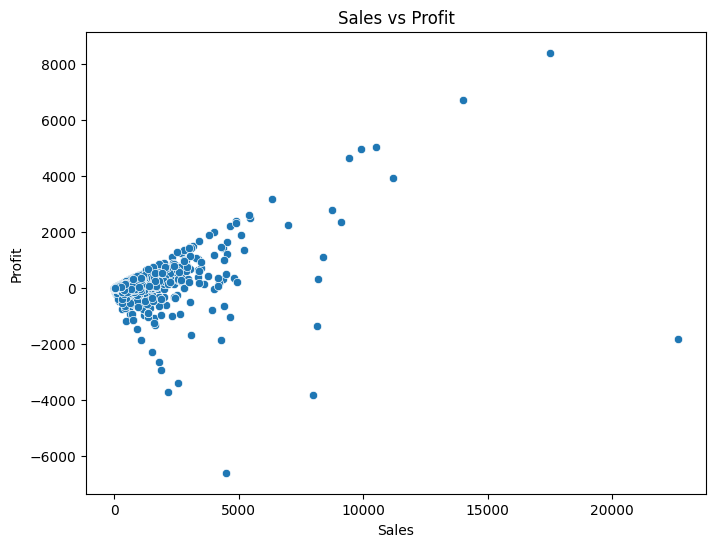

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, alpha=1)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


> we use this chart to see the relationship between sales and profit for each order. it helps us find patterns like high sales but low or negative profit.

> most orders have low sales and low profit, showing many small transactions.

> some orders have high sales but still give a loss, which may mean discounting or cost issues.

> high sales usually lead to high profit, but not always — a few high sales give negative profit.

> the plot helps spot outliers — a few orders give very high profit or loss and should be checked.

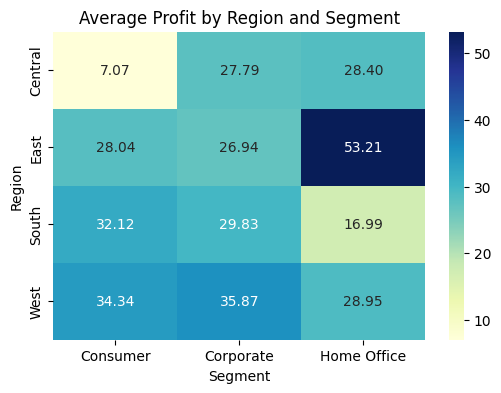

In [58]:
pivot_table = df.pivot_table(values='Profit', index='Region', columns='Segment', aggfunc='mean')
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Profit by Region and Segment')
plt.show()


> we use this chart to compare average profit across different customer segments and regions. it helps find which group is most profitable.

> east region's home office segment gives the highest average profit, so it may be worth focusing more there.

> central region's consumer segment has the lowest average profit, which may need attention or change in strategy.

> west region performs well across all segments, showing consistent profits.
this chart helps target profitable segments and improve weak areas.

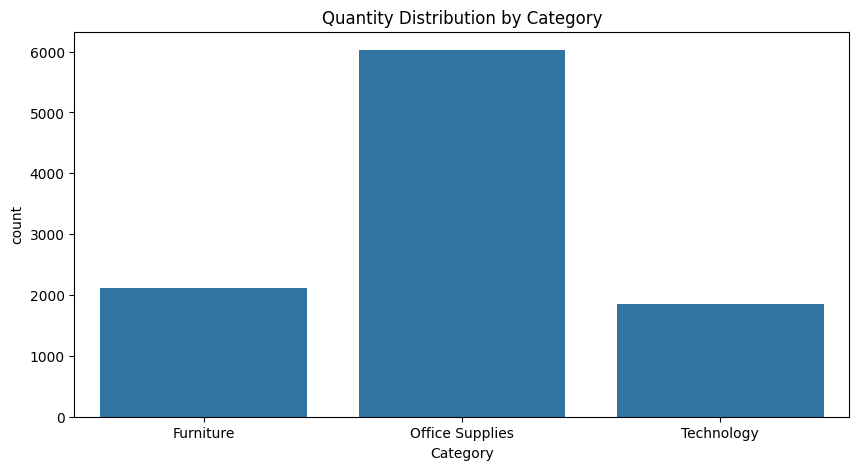

In [65]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Category',  data=df)
plt.title('Quantity Distribution by Category')
plt.show()


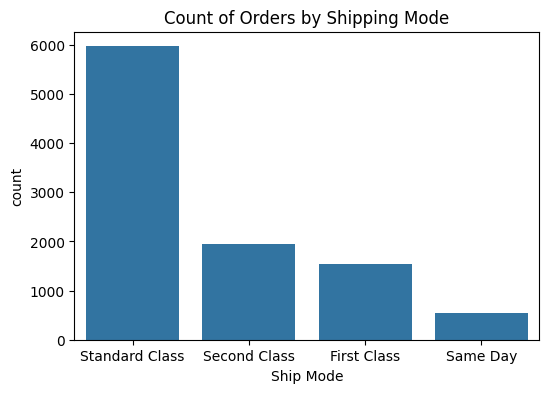

In [66]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Ship Mode', data=df, order=df['Ship Mode'].value_counts().index)
plt.title('Count of Orders by Shipping Mode')
plt.show()


we use this chart to see which product category sells the most in terms of quantity.

office supplies have the highest quantity sold, showing they are in regular demand.

furniture and technology are sold much less, which may be due to higher prices or slower-moving inventory.

this helps in planning inventory and focusing on categories with high or low turnover.

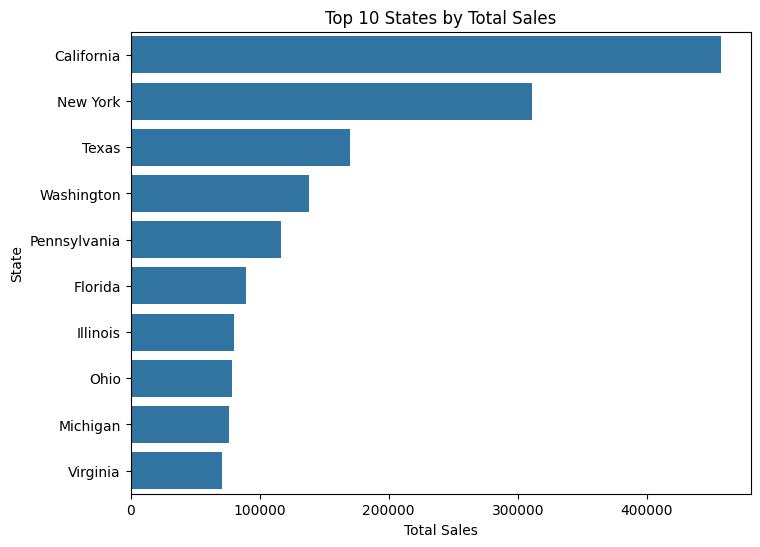

In [67]:
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title('Top 10 States by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()


we use this chart to find the top-performing states in terms of total sales.

california leads by a large margin, making it a key market to focus on.

new york also shows strong performance, worth continued investment.

states like texas and washington follow but at a much lower level.

this helps decide where to expand, invest more, or improve strategies.

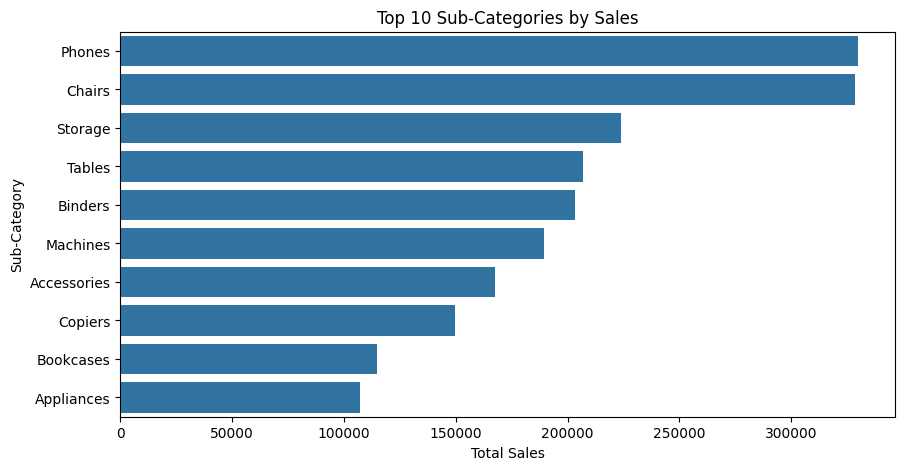

In [70]:
top_subcats = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_subcats.values, y=top_subcats.index)
plt.title("Top 10 Sub-Categories by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Sub-Category")
plt.show()



we use this chart to see which product sub-categories bring in the most sales.

phones and chairs are the top sellers, showing strong customer demand.

storage, tables, and binders also perform well, making them good areas to invest more.

appliances and bookcases are lowest among the top 10, so there may be room to improve or promote more.

this helps decide which products to stock more, advertise, or bundle.

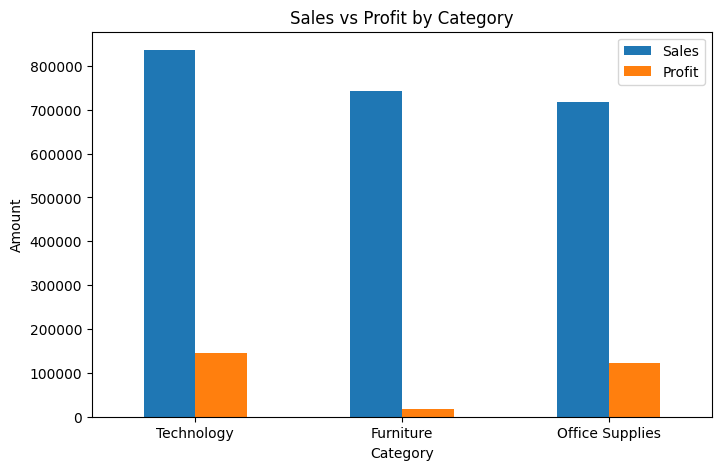

In [71]:
category_sales = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

category_sales.plot(kind='bar', figsize=(8,5))
plt.title("Sales vs Profit by Category")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()


we use this chart to compare total sales and profit across product categories.

technology has the highest sales and profit, making it the top-performing category.

furniture has high sales but very low profit, which may suggest high costs or discount issues.

office supplies have the lowest sales but better profit than furniture, showing good margins.

this helps decide where to improve pricing, reduce costs, or shift focus.


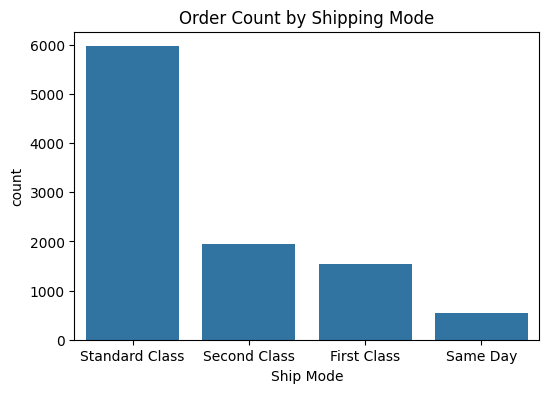

In [72]:
plt.figure(figsize=(6,4))
sns.countplot(x='Ship Mode', data=df, order=df['Ship Mode'].value_counts().index)
plt.title("Order Count by Shipping Mode")
plt.show()


we use this chart to see which shipping modes customers choose most often.

standard class is the most used shipping method by far, showing it’s the preferred and likely most cost-effective option.

same day shipping is the least used, likely due to higher cost or limited need.

second class and first class are used less than standard but still have a decent share.

this helps in managing logistics, delivery costs, and planning offers around popular shipping choices.

### Conclusion

most customers choose standard shipping, showing they prefer lower delivery costs over fast service. premium options like same day or first class are used less, possibly due to higher fees or low urgency. this insight suggests the business should focus on improving the efficiency and reliability of standard shipping, as it serves the majority of orders. additionally, consider promoting faster options through limited-time free upgrades or bundling with high-value purchases to increase their usage without hurting profits.
